## Outlier Detection Techniques

In [1]:
# importing dependencies here
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(os.path.join("data", "datafile.csv"))

In [3]:
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
1,Perch,110.0,20.0,22.0,23.5,5.5225,3.9950
2,Roach,160.0,20.5,22.5,25.3,7.0334,3.8203
3,Parkki,60.0,14.3,15.5,17.4,6.5772,2.3142
4,Bream,700.0,30.4,33.0,38.3,14.8604,5.2854


In [4]:
data.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
1     Perch   110.0     20.0     22.0     23.5   5.5225  3.9950
2     Roach   160.0     20.5     22.5     25.3   7.0334  3.8203
3    Parkki    60.0     14.3     15.5     17.4   6.5772  2.3142
4     Bream   700.0     30.4     33.0     38.3  14.8604  5.2854
..      ...     ...      ...      ...      ...      ...     ...
106   Perch   197.0     23.5     25.6     27.0   6.5610  4.2390
107  Parkki   140.0     19.0     20.7     23.2   8.5376  3.2944
108   Roach   110.0     19.1     20.8     23.1   6.1677  3.3957
109   Perch   685.0     34.0     36.5     39.0  10.8810  6.8640
110   Perch   300.0     26.9     28.7     30.1   7.5852  4.6354

[111 rows x 7 columns]>

In [5]:
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [6]:
numerical = ["Weight", "Length1", "Length2", "Length3", "Height", "Width"]

## Interquartile Range

In [7]:
for col in numerical:
    df = data[col]
    df_Q1 = df.quantile(0.25)
    df_Q3 = df.quantile(0.75)
    df_IQR = df_Q3 - df_Q1
    df_lowerend = df_Q1 - (1.5 * df_IQR)
    df_upperend = df_Q3 + (1.5 * df_IQR)
    
    df_outliers = df[(df < df_lowerend) | (df > df_upperend)]
    print(df_outliers)

13    1550.0
Name: Weight, dtype: float64
13    56.0
Name: Length1, dtype: float64
13    60.0
Name: Length2, dtype: float64
Series([], Name: Length3, dtype: float64)
Series([], Name: Height, dtype: float64)
Series([], Name: Width, dtype: float64)


## Z-Score

In [8]:
threshold = 3
for col in numerical:
    mean = np.mean(data[col])
    std = np.std(data[col])
    
    for i in data[col]:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            print(f"{col} Row Index {(data[data[col]==i].index.values)}, Value {i}")
    

Weight Row Index [13], Value 1550.0
Length1 Row Index [13], Value 56.0
Length2 Row Index [13], Value 60.0


## DBSCAN

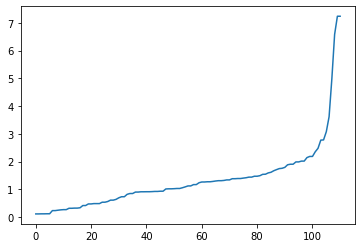

In [9]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=4)
X = data[["Length1", "Length2", "Length3", "Height", "Width"]]
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances)
plt.show()

In [10]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

numerical = ["Length1", "Length2", "Length3", "Height", "Width"]
for col in numerical:
    X = data[col]
    db = DBSCAN(eps=4, min_samples=4)
    db.fit_predict(data[col].values.reshape(-1,1))
    print(X[db.labels_==-1])


13    56.0
84    52.0
Name: Length1, dtype: float64
13    60.0
84    56.0
Name: Length2, dtype: float64
13    64.0
84    59.7
Name: Length3, dtype: float64
Series([], Name: Height, dtype: float64)
Series([], Name: Width, dtype: float64)
